# Linguistic Data Organisation with Python
One of the many various advantages why applied linguists and data scientists prefer Python alike is ita abundance of rich frameworks and libraries designed by numerous engineers and thoroughly tested. Some of them, in particular **Numpy**, **Pandas** and **Matplotlib** form a famous trio of data arrangement and visualisation, which far exceeds GUI-based applications such as Google Spreadsheets. In this notebook, you will learn about what Pythonic libraries draw the best data management practices in a simple and comprehensible way.

# NumPy
The first and simplest one is the library used to process numeric data and advanced math operations. *NumPy* is a library that pairs simplicity and flexibility of Python with C-backed primitive lightweight numeric constraints and allows developers generate true arrays of integers or floating-point numbers the same way as in C. This package is primarily concerned with boosting performance with aid of homogenous arrays and performing mathematical operations on them.   

## Array initialisation
Making an array in NumPy is as easy as calling its `array()` method and passing a Pythonic list.

In [2]:
import numpy as np
#Create an array with a list:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#Create an array with a range:
range_ = np.arange(1, 21, 2)
#Create an hollow array:
hollow = np.empty(10) #np.zeros() or np.ones() are also options
print(type(array), type(range), type(hollow))
print(array)
print(range_)
print(hollow)

<class 'numpy.ndarray'> <class 'type'> <class 'numpy.ndarray'>
[ 1  2  3  4  5  6  7  8  9 10]
[ 1  3  5  7  9 11 13 15 17 19]
[4.66134182e-310 0.00000000e+000 6.92119317e-310 6.92119318e-310
 6.92119317e-310 6.92119318e-310 6.92117379e-310 6.92119317e-310
 6.92119317e-310 6.92119318e-310]


As we can see, all true arrays in Python are treated as objects of the `numpy.ndarray` (n-dimensional) classes. In similar way to lists, they hold a sequence of values, however what makes them powerful is that:
1. arrays are fixed-size, they cannot have cells inserted or removed once initialised;
2. arrays are always homogenous, which means they can only store values of the same type;
3. Numpy opens a way to use primitive values, since in Python everything is objects.

## Array modification
NumPy allows developers to generate arrays out of existing iterables, generators, create an empty or array filled with zeroes or ones initially. Because arrays are fixed, items cannot be inserted or deleted from them, however it's possible to generate new arrays that copy all of the previous items with specified changes, similarly to C++ `std::vector`. 

In [3]:
#Modifying arrays. Notice a new array is generated each time, and we point 
#the variable to the new array so that the old one is garbage collected.
array = np.append(array, 11)
array = np.insert(array, 0, 0)
array = np.delete(array, 3)
print(array)

[ 0  1  2  4  5  6  7  8  9 10 11]


## Multidimensional arrays
Arrays are not just chains of values, but it is possible to extend them into multiple dimensions. NumPy was specifically designed to handle them efficiently. All of the operations described before are applicable to them too.

In [4]:
#Accessing array values and slicing
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(matrix)
rowSlice = matrix[0]
columnSlice = matrix[:, 0]
print(rowSlice)
print(columnSlice)
print("~~~~~")
#Accessing elements with a range:
rowSliceShortened   = matrix[0, 0:2]
columnSliceShortned = matrix[0:2, 0]
print(rowSliceShortened)
print(columnSliceShortned)
print("~~~~~")
#Accessing elements with a list:
rowListSlice    = matrix[0, [0, 2]] #Get the first and third elements of the first row
columnListSlice = matrix[[0, 2], 0] #Get the first and third elements of the first column
print(rowListSlice)
print(columnListSlice)
print("~~~~~")
#Accessing elements with a boolean array:
rowBoolSlice    = matrix[0, [True, False, True]] #Get the first and third elements of the first row
columnBoolSlice = matrix[[False, False, True], 0] #Get the last element of the first column
print(rowBoolSlice)
print(columnBoolSlice)
print("~~~~~")

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3]
[1 4 7]
~~~~~
[1 2]
[1 4]
~~~~~
[1 3]
[1 7]
~~~~~
[1 3]
[7]
~~~~~


All operators apply the operation to all array values. For example, an expression like `array * 5` will generate a new array whose all values are multiplied by 5.

In [5]:
# Aray operations
added      = array + 1
subtracted = array - 1
multiplied = array * 2
divided    = array / 2
print(added)
print(subtracted)
print(multiplied)
print(divided)


[ 1  2  3  5  6  7  8  9 10 11 12]
[-1  0  1  3  4  5  6  7  8  9 10]
[ 0  2  4  8 10 12 14 16 18 20 22]
[0.  0.5 1.  2.  2.5 3.  3.5 4.  4.5 5.  5.5]


## Array types
NumPy comes with the built-in primitive datatypes that date back to the origin of computer science and lie in the foundation of ancient languages, such as C, Fortran or APL. 

In [6]:
integers = np.zeros(10, dtype=np.int32) 
floats   = np.zeros(10, dtype=np.float32)
print(integers)
print(floats)

try: 
    integers[0] = 17.5 #Assign a floating point number to an integer array
    floats[0] = 56 #Assign an integer to a floating point array
except ValueError as e:
    print(e)
print(integers)
print(floats)

[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[17  0  0  0  0  0  0  0  0  0]
[56.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


As we can see, NumPy automatically casts given value into the array's respective type and does not raise any error in inherent for C manner. Aside from those, these types are also available (with C equivalents in parentheses):
* `numpy.bool_` (bool) boolean (true or false) bytes;
* `numpy.byte` (singed char), `.ubyte` (unsigned char), `.intc` (int), `.short` (short), `.int_` (long), `.longlong` (long long), `.ulonglong` (unsigned long long) are all platform-specific;
* `numpy.half`/`.float16` half precision floating-point: 5 bit exponent, 10 bits mantissa;
* `numpy.single` (float) single precision floating-point number, typically 8 bit exponent and 23 bit mantissa;
* `numpy.double` (double), `.longdouble` (long double) double presision floating-point number: 11 bit exponent, 52 bit mantissa;
* `numpy.cdouble` (double complex), `.csingle` complex number represented as real and imaginary components with two double/single precision values;
* `numpy.string_` (char*) string texts.

When the arrays are defined with a specific type, the range of operations available for them significantly decreases and may cause certain exceptions at the runtime as it is inherent for a dynamically-typed language. In Python, not every value can even be remotely known at the stage of development, therefore this issue is addressed with the special `numpy.object_` type. Under the hood, it sacrifices possible performance gains array usage brings over lists for the purpose of flexibility by storing in the array not the actual values but pointers to respective Python objects. At this point, they differ from original Python lists really little and excessive insertion and deletion leads to making arrays entirely obsolete.  
_Conclusion: Don't expect a dynamic interpreted language to be safe or performant, use Go instead._

In [7]:
flexible = np.zeros(10, dtype=np.object_)
strict = np.zeros(10, dtype=np.int32)
def unknownData(base, index):
    #This functions returns a float or a string, and it
    #makes it inconvinient to use in conjuction with arrays.
    return base + index if index % 2 == 0 else str(base + index)

try:
    for i in range(10):
        flexible[i] = unknownData(10, i)
        strict[i]   = unknownData(10, i)
except ValueError as e:
    print(e)
print(flexible)
print(strict)

[10 '11' 12 '13' 14 '15' 16 '17' 18 '19']
[10 11 12 13 14 15 16 17 18 19]


From what we see, NumPy forces the input values to align to the array types by casting them, which may work for integers, floats and strings, however there are fundamental issues in type coehersion found in JavaScript: unpredictability, uncontrollability and absurd it sometimes may cause. On top of that, the integer 14 is an entirely different piece of data than the string "14", which makes the conversion inaccurate. It makes sense to opt for specifically-typed arrays when possible and only using `numpy.object_` when developer needs restricted-sized scope of objects of custom types.

# Pandas
Pandas is another popular toolkit used to organise and manage massive pieces of data. It primarily deals with representing data in a spreadsheet-like structures and performing operations on them in a similar way Microsoft Excel can, but in a programatic way. One of the essential advantages of Pandas is that you do not have the whole table visually in front of you but can manipulate it with object-oriented code, which makes dat manipulation immensely more productive and less overwhelming.  

## Series
Under the hood, pandas use two fundamental data structures: **Series** and **Dataframes**. Series are similar to Pythonic lists in a lot of ways: they are sequential containers that can take in any value and access them by index beginning with zero. However, those series also accept an alias for every value enabling them to be used as _dictionaries_. In fact, this data structure is rather used to represent a row in a table, and values from a row can neither be accessed through the name of the column or number of cell after the beginning.

In [8]:
#Pandas Series demonstration
import pandas as pd
tens = pd.Series([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
tens.name = "Tens" #Title the series
tens.index.name = "Index" #Title the index
print(tens)
print(tens[0]) #Accessing a single element

Index
0     10
1     20
2     30
3     40
4     50
5     60
6     70
7     80
8     90
9    100
Name: Tens, dtype: int64
10


In [9]:
tens.index = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"] #Change the index
tens = pd.concat([tens, pd.Series([110, 120], index=["K", "L"])]) #Concatenate two series
tens.drop(["A", "B"]) #Drop elements from the series
print(tens)
print(tens.min(), tens.max(), tens.mean(), tens.median(), tens.std()) #Get some statistics

A     10
B     20
C     30
D     40
E     50
F     60
G     70
H     80
I     90
J    100
K    110
L    120
dtype: int64
10 120 65.0 65.0 36.05551275463989


## Dataframe
Pandas group multiple series together in a 2-dimensional layout to achieve a spreadsheet-like data structure called **dataframe**. In order to store and process these dataframes, Pandas use a special file format called _comma separated values_ (`.csv`). In this format, every cell is represented as a piece of text, newlines define new rows, and columns are separated with commas after all entries. 

In [10]:
#Data from the Cambridge Dictionary https://dictionary.cambridge.org/
with open("/workspaces/linguistic-research/Sources/Dictionary.csv") as f:
    dictionary = pd.read_csv(f)
print(dictionary)

            Word       Pronunciation           Stem Part of speech Level
0        abandon         /əˈbæn.dən/        abandon           verb    A2
1    magnificent    /mæɡˈnɪf.ɪ.sənt/    magnificent      adjective    B1
2         hardly          /ˈhɑːd.li/           hard         abverb    B1
3   breathtaking     /ˈbreθˌteɪ.kɪŋ/   breathtaking      adjective    B2
4  unforgettable  /ˌʌn.fəˈɡet.ə.bəl/  unforgettable      adjective    B1
5      horrified       /ˈhɒr.ɪ.faɪd/        horrify           verb    C2
6            rob               /rɒb/            rob           verb    B1
7           like              /laɪk/           like           verb    A1
8       insanely        /ɪnˈseɪn.li/         insane         adverb    C1


In [11]:
#Dataframe operations and manipulations
dictionary["Length"] = dictionary["Word"].apply(len) #Add a column with the length of each word
dictionary["Length"] = dictionary["Length"].astype(np.int32) #Change the type of the column
dictionary.head() #Show the first 5 rows
#dictionary.tail() #Show the last 5 rows

,Word,Pronunciation,Stem,Part of speech,Level,Length
0,abandon,/əˈbæn.dən/,abandon,verb,A2,7
1,magnificent,/mæɡˈnɪf.ɪ.sənt/,magnificent,adjective,B1,11
2,hardly,/ˈhɑːd.li/,hard,abverb,B1,6
3,breathtaking,/ˈbreθˌteɪ.kɪŋ/,breathtaking,adjective,B2,12
4,unforgettable,/ˌʌn.fəˈɡet.ə.bəl/,unforgettable,adjective,B1,13


In [12]:
dictionary.describe() #Get some statistics

,Length
count,9.000000
mean,8.111111
std,3.480102
min,3.000000
25%,6.000000
50%,8.000000
75%,11.000000
max,13.000000


In [13]:
print(dictionary["Pronunciation"]) #Extract column as a Series object
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(dictionary[["Word", "Pronunciation"]]) #Extract multiple columns as a DataFrame object
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(dictionary[0:2]) #Extract rows by index. loc() and iloc() are also options

0           /əˈbæn.dən/
1      /mæɡˈnɪf.ɪ.sənt/
2            /ˈhɑːd.li/
3       /ˈbreθˌteɪ.kɪŋ/
4    /ˌʌn.fəˈɡet.ə.bəl/
5         /ˈhɒr.ɪ.faɪd/
6                 /rɒb/
7                /laɪk/
8          /ɪnˈseɪn.li/
Name: Pronunciation, dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            Word       Pronunciation
0        abandon         /əˈbæn.dən/
1    magnificent    /mæɡˈnɪf.ɪ.sənt/
2         hardly          /ˈhɑːd.li/
3   breathtaking     /ˈbreθˌteɪ.kɪŋ/
4  unforgettable  /ˌʌn.fəˈɡet.ə.bəl/
5      horrified       /ˈhɒr.ɪ.faɪd/
6            rob               /rɒb/
7           like              /laɪk/
8       insanely        /ɪnˈseɪn.li/
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          Word     Pronunciation         Stem Part of speech Level  Length
0      abandon       /əˈbæn.dən/      abandon           verb    A2       7
1  magnificent  /mæɡˈnɪf.ɪ.sənt/  magnificent      adjective    B1      11


In conclusion we can say that Pandas do quite a great job at organising data in the form of tables, as well as extracting rows, columns, individual values; and providing essential statistics about the data it populates. Dataframes can be extended as it's inherent for Python and slices can be stored in variables, which allows applied linguists to find meaningful insights and cover edge cases.

# Matplotlib
Matplotlib is exceptional when it comes to data visualisation, and it shows how much Python excels at data science. This niche library is devoted to plotting various graphs directly in the terminal or Jupyter Notebook output, which aids in showcasing the results of study.  

## Math graphs
In order to plot a basic graph that draws the mathematical functions _f(x)_, we need to supply the `x`s and `y`s values, and call the `plot()` method. Matplotlib will take care of drawing a chart that shows it. On top of that, we can also title it, add multiline lines, describe the legend and manipulate the scope of the chart value indexing.

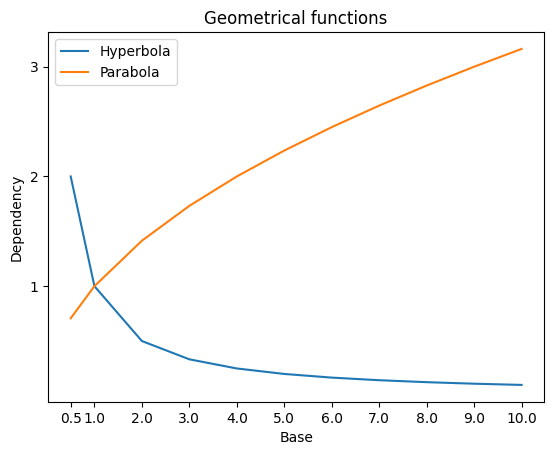

In [34]:
from math import sqrt
import matplotlib.pylab as plt 
def hyperbola(x: float):
    """Yields the value of the hyperbola function at x."""
    return 1 / x
def radical(x: float):
    """Yields the value of the radical function at x."""
    return sqrt(x)

xs = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]#Arranging the x values
ys = [hyperbola(x) for x in xs]          #Arranging the y values
ps = [radical(x) for x in xs]            #Arranging the y values
plt.plot(xs, ys, label="Hyperbola")      #Plot the first graph
plt.plot(xs, ps, label="Parabola")       #Plot the second graph
plt.xticks(xs)                           #Set the x ticks
plt.yticks([1, 2, 3])                    #Set the y ticks
plt.legend()                             #Show the legend
plt.title("Geometrical functions")       #Set the title
plt.xlabel("Base")                       #Set the x label
plt.ylabel("Dependency")                 #Set the y label
plt.autoscale()                          #Autoscale the graph
plt.show() 

Matplotlib on top of that allows developers to copy the chart and export it as an image that can be used in the educational purposes. In situations like this, it becomes vital to make a difference between multiple graph lines.

In [ ]:
#Chart customisation
